# Pythonの基礎ライブラリ 
ここでは、ライブラリについての基礎的事項のメモを記す。  
特に、科学技術計算でよく用いられるライブラリには、NumpyやScipyがある。

## ライブラリの基礎  
- モジュール・・・よく使用される関数やクラスをまとめたもの
- ライブラリ・・・複数モジュールを束ねたもの、パッケージを指す  
  
パッケージやモジュールの呼び出しには、import文を用いる。かなり柔軟な書き方にも対応していて、Numpyの呼び出しを例にとると、以下のようになる。

In [1]:
import numpy            # numpyパッケージを読み込む
import numpy as np      # numpyパッケージをnpという名前で読み込む
from numpy import random    # numpyパッケージの中のrandomモジュールを読み込む
import numpy.random         # 同じモジュールをnumpy.randomと言う名前で読み込む
from numpy import *         # numpyパッケージの全モジュールを読み込む

## 標準ライブラリ 
ここでは、プログラムの実行速度を計測できる標準ライブラリを紹介する。代表的なものとして、timeモジュールの使用が挙げられる。

In [2]:
import time
t1 = time.time()        # 処理前の時刻を取得
for i in range(1000000):
    i ** 10
t2 = time.time()        # 処理後の時刻を取得
elapsed_time = t2 - t1
print(elapsed_time)     # 経過時間を出力（sec） 

0.2881929874420166


比較的大きなプログラムを組む場合、どの処理がボトルネックになっているかを調べることはプログラムを高速化する上では重要である。その場合に便利なモジュールとして、"cProfile"というものがある。例えば、以下のようにして使用する。

In [5]:
import cProfile
def func():
    def func1():
        for i in range(3000000):
            i ** 2
    def func2():
        for i in range(1000000):
            i ** 2
    func1()
    func2()
    func2()
cProfile.run("func()")  # run関数に処理を渡して実行

         7 function calls in 1.091 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    1.091    1.091 3032596829.py:2(func)
        1    0.662    0.662    0.662    0.662 3032596829.py:3(func1)
        2    0.429    0.215    0.429    0.215 3032596829.py:6(func2)
        1    0.000    0.000    1.091    1.091 <string>:1(<module>)
        1    0.000    0.000    1.091    1.091 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




## Numpyライブラリ  
Numpyライブラリは、数値計算を行うために必須なライブラリである。  
ndarrayクラスは、行列やベクトルを表現するクラスタであり、関連する様々なメソッドや演算が定義されている。

In [6]:
import numpy as np
a = np.array([1,2,3])

他にも様々な初期化関数が用意されている。たとえば、以下のようなものがある。

In [7]:
np.zeros(2)             # 要素がすべて0の1次元配列
np.ones((2,2))          # 要素がすべて1の2次元配列
np.arange(2,9,2)        # 2以上9未満の偶数のみの配列
np.linspace(0, 10, 5)   # 0以上10以下、2.5刻みの配列
np.eye(10)              # 10✖️10の単位行列    

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

ndarrayクラスの便利な点は、数値計算に必要な様々な処理が関数として定義されている点であり、適切な関数をコールして使うことで、高速に動作するコードを簡潔に書けることである。たとえば、データのソートは以下のように１行で書ける。

In [9]:
a = np.array([2,1,5,3,7,4,6,8])
np.sort(a)

array([1, 2, 3, 4, 5, 6, 7, 8])

少し実践的な例として、n番目の要素が$\exp(2\pi n/N)$ (n=0,1, ・・・,N-1)で与えられる1次元配列を取得する問題を考える。

In [12]:
N, a = 10000, []
i = np.arange(N)/N
a = np.exp(2j * np.pi * i)
print(a)

[1.        +0.j         0.9999998 +0.00062832j 0.99999921+0.00125664j ...
 0.99999822-0.00188495j 0.99999921-0.00125664j 0.9999998 -0.00062832j]


2次元のndarrayオブジェクト、つまり行列は次のように記述する。

In [18]:
A = np.array([[1,1],[0,1]])
B = np.array([[2,0],[3,4]])
print(A)
print(B)
C = A * B       # 要素ごとの積
D = A @ B       # 行列としての積
print(C)
print(D)
print(A.T)      # 転置行列を得る

[[1 1]
 [0 1]]
[[2 0]
 [3 4]]
[[2 0]
 [0 4]]
[[5 4]
 [3 4]]
[[1 0]
 [1 1]]


そのほか、numpy.linalgという線形代数演算をまとめたモジュールを使用することで、以下のように行列に関する演算もできる。

In [19]:
A = np.array([[1,2,3],[2,1,2],[3,2,1]])
A_det = np.linalg.det(A)           # 行列式の計算
A_inv = np.linalg.inv(A)           # 逆行列の計算
print(A_det)
print(A_inv)

8.000000000000002
[[-0.375  0.5    0.125]
 [ 0.5   -1.     0.5  ]
 [ 0.125  0.5   -0.375]]


## Scipyライブラリ
Scipyは補完、積分、最適化、画像処理、統計処理、特殊関数などを含む科学技術計算用の多彩なツールボックスである。  
Scipyは各種の計算ツールをサブパッケージに持つ巨大なパッケージであり、それぞれ個別に呼び出して使用するのが基本的な使い方になる。

In [1]:
import scipy        # scipy.specialパッケージを読み込む
from scipy import special   # 上と同じだが、名前がspecialになる

specialモジュールには、様々な特殊関数が実装されており、例えば第１種Bessel関数$Jv(z)$を呼び出すには以下のようにする。

In [3]:
from scipy import special
special.jv(0,0)         # 第１引数はv、第２引数はzの値
special.jv(0,[0,1,2])   # リストやnp.ndarrayなどにも対応

array([1.        , 0.76519769, 0.22389078])

Scipyを用いて数値積分も行うことができる。例えば、以下のBessel関数の積分を行う。  
$$
I = \int_{0}^{5}J_{2.5} (x) dx
$$
これを実行するには、integrateモジュールをインポートして以下のように記述する。

In [5]:
from scipy import integrate
def func(x):
    return special.jv(2.5, x)
res = integrate.quad(func, 0, 5)
print(res)

(1.271185605806995, 1.1793280638035841e-08)


情報処理などで頻繁に用いられるフーリエ変換も簡単に実行できる。  
fftモジュールを用いて以下のように実行する。 

In [8]:
import numpy as np
from scipy.fft import fft
N, T = 600, 1/800           # サンプリング数とサンプリング間隔の定義
x = np.linspace(0, N*T, N, endpoint=False)
y = np.sin(50*2*np.pi*x) + 0.5 * np.sin(80*2*np.pi*x)
yf = fft(y)                 # フーリエ変換

## Matplotlib  
数値計算の解釈・理解には計算結果の可視化が欠かせない。Matplotlibを使うと、NumpyやScipyで計算した結果を使って、様々な図を書くことができる。  
Matplotlibの表現能力は高く、Excelでの図・グラフよりも見栄えの良いのを描くことができる。  
  
ここでは、最も基本的な使い方として、xy平面上に適当な関数y(x)をプロットしてみる。

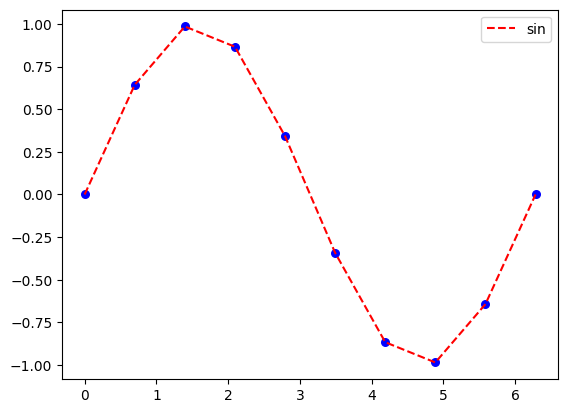

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)           # プロットしたい1次元配列を準備
plt.plot(x, y, color="red", linestyle="dashed", label="sin")  # x,y座標データの他、色やスタイル、凡例の指定ができる
plt.scatter(x, y, s=30, c="blue")   # 散布図のプロットにはscatterを用いる
plt.legend()   # 凡例の表示
plt.show()     # 描画


また、2次元データを画像として表示するのに、imshow関数、ヒストグラムの計算と描画にhist関数を使用できる。例えば以下のようになる。

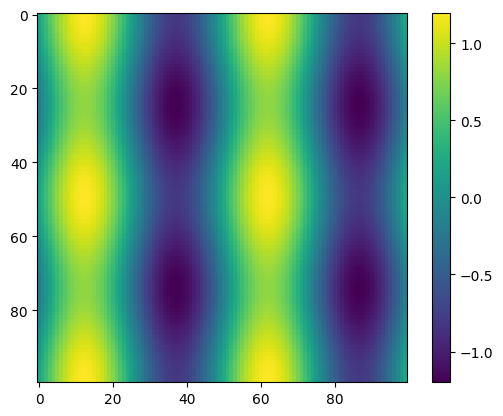

In [3]:
a = np.linspace(0, 4*np.pi, 100)
x, y = np.meshgrid(a, a)        # 2次元メッシュの生成
z = np.sin(x) + 0.2*np.cos(y)   # プロットしたい配列の準備
plt.imshow(z)
plt.colorbar()     # カラーバーの表示
plt.show()

正規分布関数に従う乱数を生成するnp.random.normalを用いて、以下のようにヒストグラムを描画してみる。

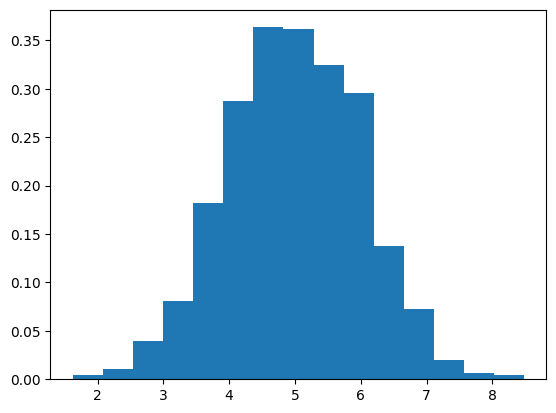

In [4]:
x = np.random.normal(5, 1, 1000)    # 平均5、標準偏差1の乱数を1000点生成して1次元配列にする
plt.hist(x, bins=15, density=True)  # ヒストグラムの表示、binsはビン数の指定、density=Trueは正規化
plt.show()
